## XGBoost - Classification

In [32]:
import pandas as pd 
import numpy as np 
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
from xgboost import plot_importance

In [33]:
# Loading in the data set
df =pd.read_csv('../csv_files/Model_Ready_Classification.csv', header=0, index_col=0)

In [34]:
# Splitting the dataset so that target variable is isolated
X, Y = df.iloc[:,:-1],df.iloc[:,-1]

In [35]:
# Creating the DMatrix which is used with XGBoost
df_dmatrix = xgb.DMatrix(data=X,label=Y)

/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [36]:
# Going to split our data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

In [37]:
# Going to create our XGBoost model. We are using Classifier since trying to predict 
xg_reg = xgb.XGBClassifier(objective ='reg:logistic', n_estimators =50, colsample_bytree = 0.3, learning_rate = 0.5, max_depth = 3, random_state=2019)

# Fitting our model
xg_reg.fit(X_train,Y_train)

# Making predictions on our model
Y_pred = xg_reg.predict(X_test)

In [38]:
# evaluate predictions
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.30%


In [39]:
# Calculating accuracy, F1 score, and AUC 
print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred))
print('F1_Score:', metrics.f1_score(Y_test, Y_pred, average='weighted'))
print('AUC:', metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

Accuracy: 0.9129993229519295
F1_Score: 0.9129155766241988
AUC: 0.9098716692398618


In [40]:
# Printing out the 'RMSE' in order to see how accurate we were
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.294959


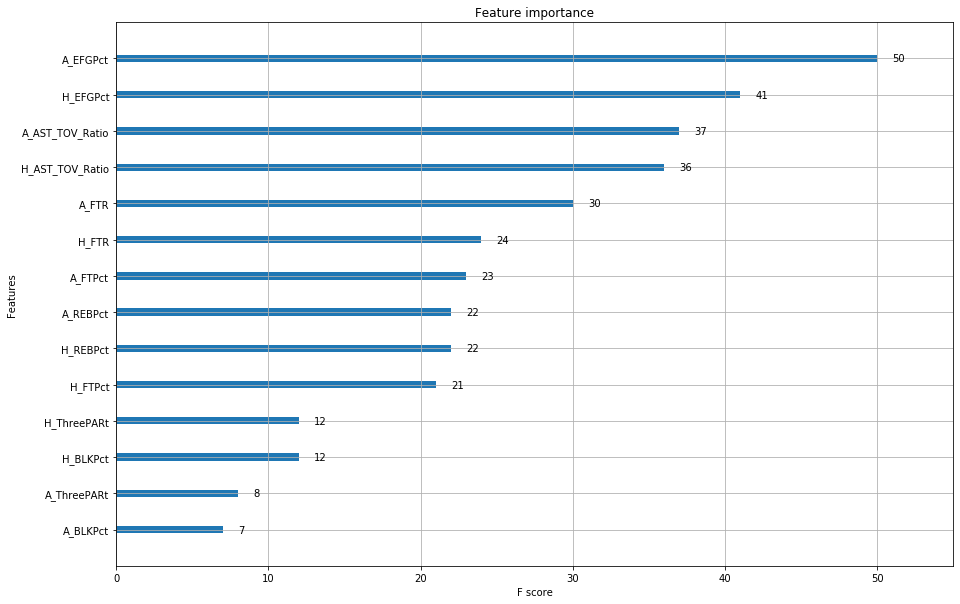

In [41]:
# Plotting the feature importance of each variable 
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 10]

In [45]:
fig1=plt.gcf()
plot_importance(xg_reg)

AttributeError: module 'matplotlib' has no attribute 'gcf'